## **A Data-Driven Market Intelligence System for Stock Risk and Behavior Analysis at the Nairobi Securities Exchange**

## Problem Statement

Despite the Nairobi Securities Exchange (NSE) seeing a surge in equity turnover-rising 18% to Ksh 56 billion in 2025 ([SE Half-Year Results, 2025](https://www.nse.co.ke/wp-content/uploads/NSE-Plc-Unaudited-Group-results-for-the-6-months-ended-30-June-2025.pdf)), retail participation remains hampered by a critical information gap. According to the Institute of Certified Investment and Financial Analysts reveals that 77% of Kenyan retail investors rely on "personal research" and social intuition because they lack accessible analytical tools ([ICIFA Annual Report, 2024](https://icifa.co.ke/static/resources/others/annual-report-2024465e3dbed42d.pdf)).

While the market added over Ksh 1 Trillion in capitalization since 2023, most investors suffer from "herding behavior," where decisions are made by following the crowd rather than technical data -[USIU-Africa Research, 2025](https://erepo.usiu.ac.ke/xmlui/bitstream/handle/11732/8460/MASILA%20BRIAN%20SALU%20MBA%202024.pdf?sequence=1&isAllowed=y). This project bridges this gap by converting raw daily prices into behavioral risk clusters, moving investors from intuition to evidence-based decision-making.

The dataset used for this analysis is publicly available from Mendeley: [Nairobi Securities Exchange (NSE) Kenya](https://data.mendeley.com/research-data/?query=Nairobi%20Securities%20Exchange%20(NSE)%20Kenya%20-%20All%20Stocks%20Prices)

## Objectives

**Main Objective**
- How can a data-driven stock market intelligence system be developed for the Nairobi Securities Exchange to support informed and risk-aware investment decisions?

**Specific Objectives**
1) `Feature Engineering:` How can financial metrics such as Rolling Volatility, Daily Returns, and Maximum Drawdowns be derived from historical stock price data to effectively quantify stock behavior?

2) `Behavioral Segmentation:` How can unsupervised machine learning techniques (e.g., K-Means and DBSCAN) be applied to group NSE-listed stocks into risk-based clusters such as stable, high-volatility, and speculative stocks?

4) `Sector Risk Analysis:` What systemic risks and stability patterns can be identified across different market sectors within the Nairobi Securities Exchange?

5) `Interactive Deployment:` How can the derived insights be interactively deployed through a Streamlit dashboard to enable users to select stocks, assess their risk profiles, and compare them against sector-level benchmarks?

**Solution**

This project aims to provide an interactive dashboard where investors can explore NSE stocks, assess risk clusters, and compare sector performance. Users can make data-driven decisions, spot stable or high-risk stocks, and identify where to invest confidently.

## Libraries & Importations

In [54]:
import pandas as pd
import numpy as np

In [55]:
df_2021 = pd.read_csv("../Data/NSE_data_all_stocks_2021_upto_31dec2021.csv")
df_2022 = pd.read_csv("../Data/NSE_data_all_stocks_2022.csv")
df_2023 = pd.read_csv("../Data/NSE_data_all_stocks_2023.csv")
df_2024 = pd.read_csv("../Data/NSE_data_all_stocks_2024.csv")


from IPython.display import display

print("2021 Stocks")
display(df_2021.head())
print("2022 Stocks")
display(df_2022.head())
print("2023 Stocks")
display(df_2023.head())
print("2024 Stocks")
display(df_2024.head())



2021 Stocks


,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,04-Jan-21,EGAD,Eaagads Ltd,8.2,14,12.5,12.5,12.5,12.5,-,-,"3,200",-
1,04-Jan-21,KUKZ,Kakuzi Plc,300,397,365,365,365,365,-,-,-,-
2,04-Jan-21,KAPC,Kapchorua Tea Kenya Plc,59,90,78,78,78,78,-,-,-,-
3,04-Jan-21,LIMT,Limuru Tea Plc,360,475,360,360,360,360,-,-,100,-
4,04-Jan-21,SASN,Sasini Plc,14.8,20,19.5,19.5,19.5,19.5,-,-,-,-


2022 Stocks


,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-22,EGAD,Eaagads Ltd,10,15,13.5,13.8,13.5,13.5,-,-,"4,000",-
1,3-Jan-22,KUKZ,Kakuzi Plc,355,427,385,385,385,385,-,-,-,-
2,3-Jan-22,KAPC,Kapchorua Tea Kenya Plc,80,101,99.5,99.5,99.5,95.5,4,4.19%,100,-
3,3-Jan-22,LIMT,Limuru Tea Plc,260,360,320,320,320,320,-,-,-,-
4,3-Jan-22,SASN,Sasini Plc,16.75,22.6,18.7,18.7,18.7,18.7,-,-,-,-


2023 Stocks


,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-23,EGAD,Eaagads Ltd,10.35,14.5,10.5,10.5,10.5,10.5,-,-,"1,900.00",-
1,3-Jan-23,KUKZ,Kakuzi Plc,342,440,385,385,385,385,-,-,-,-
2,3-Jan-23,KAPC,Kapchorua Tea Kenya Plc,207,280,115.75,115.75,115.75,113.25,2.5,2.21%,100,-
3,3-Jan-23,LIMT,Limuru Tea Plc,365,380,420,420,420,420,-,-,-,-
4,3-Jan-23,SASN,Sasini Plc,15.1,22,22,22.5,22.45,22.45,-,-,"6,900.00",-


2024 Stocks


,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,2-Jan-24,EGAD,Eaagads Ltd,10.35,14.5,12.8,12.8,12.8,13.95,-1.15,-8.24%,100,-
1,2-Jan-24,KUKZ,Kakuzi Plc,342,440,385,385,385,385,-,-,-,-
2,2-Jan-24,KAPC,Kapchorua Tea Kenya Plc,207,280,215,215,215,215,-,-,-,-
3,2-Jan-24,LIMT,Limuru Tea Plc,365,380,380,380,380,380,-,-,-,-
4,2-Jan-24,SASN,Sasini Plc,15.1,22,20,20,20,20,-,-,"3,300.00",-


In [56]:
df_2021.rename(columns={
    'DATE': 'Date',
    'CODE': 'Code',
    'NAME': 'Name',
    'Adjust': 'Adjusted Price'
}, inplace=True)

In [57]:
df_2021.head()

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,04-Jan-21,EGAD,Eaagads Ltd,8.2,14,12.5,12.5,12.5,12.5,-,-,"3,200",-
1,04-Jan-21,KUKZ,Kakuzi Plc,300,397,365,365,365,365,-,-,-,-
2,04-Jan-21,KAPC,Kapchorua Tea Kenya Plc,59,90,78,78,78,78,-,-,-,-
3,04-Jan-21,LIMT,Limuru Tea Plc,360,475,360,360,360,360,-,-,100,-
4,04-Jan-21,SASN,Sasini Plc,14.8,20,19.5,19.5,19.5,19.5,-,-,-,-


## Load Sector Data

In [58]:
import pandas as pd

sectors_2021 = pd.read_csv("../Data/NSE_data_stock_market_sectors_as_at_31dec2021.csv")
sectors_2022 = pd.read_csv("../Data/NSE_data_stock_market_sectors_2022.csv")
sectors_2023_2024 = pd.read_csv("../Data/NSE_data_stock_market_sectors_2023_2024.csv")


In [59]:
print("2021 Sector Data:")
display(sectors_2021.head())
print("\n2022 Sector Data:")
display(sectors_2022.head())
print("\n2023-2024 Sector Data:")
display(sectors_2023_2024.head())

2021 Sector Data:


,SECTOR,CODE,NAME
0,Agricultural,EGAD,Eaagads Ltd
1,Agricultural,KUKZ,Kakuzi Plc
2,Agricultural,KAPC,Kapchorua Tea Kenya Plc
3,Agricultural,LIMT,Limuru Tea Plc
4,Agricultural,SASN,Sasini Plc



2022 Sector Data:


,Sector,Stock_code,Stock_name
0,Agricultural,EGAD,Eaagads Ltd
1,Agricultural,KUKZ,Kakuzi Plc
2,Agricultural,KAPC,Kapchorua Tea Kenya Plc
3,Agricultural,LIMT,Limuru Tea Plc
4,Agricultural,SASN,Sasini Plc



2023-2024 Sector Data:


,Sector,Stock_code,Stock_name
0,Agricultural,EGAD,Eaagads Ltd
1,Agricultural,KUKZ,Kakuzi Plc
2,Agricultural,KAPC,Kapchorua Tea Kenya Plc
3,Agricultural,LIMT,Limuru Tea Plc
4,Agricultural,SASN,Sasini Plc


## Standardize Sector Column Names

In [60]:
# Standardize all sector columns
sectors_2021 = sectors_2021.rename(columns={
    'SECTOR': 'Sector', 
    'CODE': 'Code', 
    'NAME': 'Name'
})

sectors_2022 = sectors_2022.rename(columns={
    'Sector': 'Sector',
    'Stock_code': 'Code', 
    'Stock_name': 'Name'
})

sectors_2023_2024 = sectors_2023_2024.rename(columns={
    'Sector': 'Sector',
    'Stock_code': 'Code', 
    'Stock_name': 'Name'
})

## Merge Each Year with Sector Information

In [61]:
# Merge stock data with sectors
df_2021_final = df_2021.merge(sectors_2021[['Code', 'Sector']], on='Code', how='left')
df_2022_final = df_2022.merge(sectors_2022[['Code', 'Sector']], on='Code', how='left')
df_2023_final = df_2023.merge(sectors_2023_2024[['Code', 'Sector']], on='Code', how='left')
df_2024_final = df_2024.merge(sectors_2023_2024[['Code', 'Sector']], on='Code', how='left')

## Concatenate ALL 4 Years

In [62]:
# Concatenate all years
all_stocks = pd.concat([df_2021_final, df_2022_final, df_2023_final, df_2024_final], ignore_index=True)

print(f"\n All 4 years concatenated!")
print(f"  Total rows: {len(all_stocks):,}")
print(f"  Shape: {all_stocks.shape}")
all_stocks.head()


 All 4 years concatenated!
  Total rows: 69,945
  Shape: (69945, 14)


,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,Sector
0,04-Jan-21,EGAD,Eaagads Ltd,8.2,14,12.5,12.5,12.5,12.5,-,-,"3,200",-,Agricultural
1,04-Jan-21,KUKZ,Kakuzi Plc,300,397,365,365,365,365,-,-,-,-,Agricultural
2,04-Jan-21,KAPC,Kapchorua Tea Kenya Plc,59,90,78,78,78,78,-,-,-,-,Agricultural
3,04-Jan-21,LIMT,Limuru Tea Plc,360,475,360,360,360,360,-,-,100,-,Agricultural
4,04-Jan-21,SASN,Sasini Plc,14.8,20,19.5,19.5,19.5,19.5,-,-,-,-,Agricultural


In [63]:
# Checking new structure

print(f"\nMissing values:\n{all_stocks.isna().sum()}")
print(f"\nDuplicates: {all_stocks.duplicated().sum()}")


Missing values:
Date                0
Code                0
Name                0
12m Low             0
12m High            0
Day Low             0
Day High            0
Day Price           0
Previous            0
Change              0
Change%             0
Volume              0
Adjusted Price      0
Sector            191
dtype: int64

Duplicates: 0


### saving merged data

In [64]:
import os
os.makedirs('../data/processed', exist_ok=True)

# Save merged but NOT cleaned data
all_stocks.to_csv('../data/processed/nse_merged_raw.csv', index=False)

print(f"  Rows: {len(all_stocks):,}")
print(f"  Years: 2021-2024")

  Rows: 69,945
  Years: 2021-2024


## note 02

# Data Cleaning

## Objective
Load the merged raw data (all 4 years) and clean it ONCE to create the final df_all dataset.

## Load Merged Raw Data from Notebook 01

In [65]:
# Load the merged raw data
all_stocks = pd.read_csv('../data/processed/nse_merged_raw.csv')

print(f"Loaded merged raw data: {all_stocks.shape}")
all_stocks.head()

Loaded merged raw data: (69945, 14)


,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,Sector
0,04-Jan-21,EGAD,Eaagads Ltd,8.2,14,12.5,12.5,12.5,12.5,-,-,"3,200",-,Agricultural
1,04-Jan-21,KUKZ,Kakuzi Plc,300,397,365,365,365,365,-,-,-,-,Agricultural
2,04-Jan-21,KAPC,Kapchorua Tea Kenya Plc,59,90,78,78,78,78,-,-,-,-,Agricultural
3,04-Jan-21,LIMT,Limuru Tea Plc,360,475,360,360,360,360,-,-,100,-,Agricultural
4,04-Jan-21,SASN,Sasini Plc,14.8,20,19.5,19.5,19.5,19.5,-,-,-,-,Agricultural


In [66]:
all_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69945 entries, 0 to 69944
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            69945 non-null  object
 1   Code            69945 non-null  object
 2   Name            69945 non-null  object
 3   12m Low         69945 non-null  object
 4   12m High        69945 non-null  object
 5   Day Low         69945 non-null  object
 6   Day High        69945 non-null  object
 7   Day Price       69945 non-null  object
 8   Previous        69945 non-null  object
 9   Change          69945 non-null  object
 10  Change%         69945 non-null  object
 11  Volume          69945 non-null  object
 12  Adjusted Price  69945 non-null  object
 13  Sector          69754 non-null  object
dtypes: object(14)
memory usage: 7.5+ MB


## Clean Numeric Columns

Convert all price, volume, and percentage columns to numeric.

In [67]:
# Columns to clean
cols = [
    "12m Low", "12m High", "Day Low", "Day High",
    "Day Price", "Previous", "Change", "Change%",
    "Volume", "Adjusted Price"
]

# Remove % sign from Change%
all_stocks["Change%"] = all_stocks["Change%"].astype(str).str.replace("%", "", regex=False)

# Remove commas, replace '-' with 0, convert to numeric
all_stocks[cols] = (
    all_stocks[cols]
        .replace(",", "", regex=True)
        .replace("-", 0)
        .apply(pd.to_numeric, errors="coerce")
)

In [68]:
all_stocks.head()

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,Sector
0,04-Jan-21,EGAD,Eaagads Ltd,8.2,14.0,12.5,12.5,12.5,12.5,0.0,0.0,3200.0,0.0,Agricultural
1,04-Jan-21,KUKZ,Kakuzi Plc,300.0,397.0,365.0,365.0,365.0,365.0,0.0,0.0,0.0,0.0,Agricultural
2,04-Jan-21,KAPC,Kapchorua Tea Kenya Plc,59.0,90.0,78.0,78.0,78.0,78.0,0.0,0.0,0.0,0.0,Agricultural
3,04-Jan-21,LIMT,Limuru Tea Plc,360.0,475.0,360.0,360.0,360.0,360.0,0.0,0.0,100.0,0.0,Agricultural
4,04-Jan-21,SASN,Sasini Plc,14.8,20.0,19.5,19.5,19.5,19.5,0.0,0.0,0.0,0.0,Agricultural


## Converting Date Column

In [69]:
all_stocks['Date'] = pd.to_datetime(all_stocks['Date'], errors='coerce')

print(f"Date range: {all_stocks['Date'].min()} to {all_stocks['Date'].max()}")

Date range: 2021-01-04 00:00:00 to 2024-12-31 00:00:00


C:\Users\PC\AppData\Local\Temp\ipykernel_12504\44100718.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_stocks['Date'] = pd.to_datetime(all_stocks['Date'], errors='coerce')


## Renaming Columns for Consistency

In [70]:
all_stocks = all_stocks.rename(columns={
    'Code': 'Stock_code',
    'Change%': '%Change'
})

print("Columns:", list(all_stocks.columns))

Columns: ['Date', 'Stock_code', 'Name', '12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Change', '%Change', 'Volume', 'Adjusted Price', 'Sector']


## Create df_all - Final Cleaned Dataset

In [71]:
# Create df_all
df_all = all_stocks.copy()

# Sort by Stock_code and Date
df_all = df_all.sort_values(['Stock_code', 'Date']).reset_index(drop=True)

df_all.head()

,Date,Stock_code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,%Change,Volume,Adjusted Price,Sector
0,2021-01-04,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.42,9.80,9.52,9.66,-0.14,1.45,18500.0,0.0,Banking
1,2021-01-05,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.44,9.70,9.44,9.52,-0.08,0.84,1923300.0,0.0,Banking
2,2021-01-06,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.40,9.68,9.44,9.44,0.00,0.00,233400.0,0.0,Banking
3,2021-01-07,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.36,9.46,9.40,9.44,-0.04,0.42,194700.0,0.0,Banking
4,2021-01-11,ABSA,ABSA Bank Kenya Plc,8.5,14.2,9.44,9.70,9.46,9.48,-0.02,0.21,77900.0,0.0,Banking


## Data Quality Checks

In [72]:
print("Missing values:")
print(df_all.isna().sum())

print(f"\nDuplicates: {df_all.duplicated().sum()}")
print(f"Date range: {df_all['Date'].min()} to {df_all['Date'].max()}")
print(f"Unique stocks: {df_all['Stock_code'].nunique()}")
print(f"Unique sectors: {df_all['Sector'].nunique()}")

Missing values:
Date                0
Stock_code          0
Name                0
12m Low             0
12m High            0
Day Low             0
Day High            0
Day Price           0
Previous            0
Change              0
%Change             0
Volume              0
Adjusted Price      0
Sector            191
dtype: int64

Duplicates: 0
Date range: 2021-01-04 00:00:00 to 2024-12-31 00:00:00
Unique stocks: 77
Unique sectors: 15


In [73]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69945 entries, 0 to 69944
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            69945 non-null  datetime64[ns]
 1   Stock_code      69945 non-null  object        
 2   Name            69945 non-null  object        
 3   12m Low         69945 non-null  float64       
 4   12m High        69945 non-null  float64       
 5   Day Low         69945 non-null  float64       
 6   Day High        69945 non-null  float64       
 7   Day Price       69945 non-null  float64       
 8   Previous        69945 non-null  float64       
 9   Change          69945 non-null  float64       
 10  %Change         69945 non-null  float64       
 11  Volume          69945 non-null  float64       
 12  Adjusted Price  69945 non-null  float64       
 13  Sector          69754 non-null  object        
dtypes: datetime64[ns](1), float64(10), object(3)
memory us

## Save Cleaned Data

In [74]:
# Save cleaned data
df_all.to_csv('../data/processed/nse_all_clean.csv', index=False)

df_all.to_csv('../data/processed/nse_merged.csv', index=False)

print(f"  nse_all_clean.csv: {df_all.shape}")
print(f"  nse_merged.csv: {df_all.shape}")

  nse_all_clean.csv: (69945, 14)
  nse_merged.csv: (69945, 14)


### note 03

## 1. Define Feature Engineering Functions

All feature engineering logic is embedded in the notebook (no external imports)

In [75]:
# Load merged data
df = pd.read_csv('../data/processed/nse_merged.csv', parse_dates=['Date'])
print(f"Loaded {len(df):,} rows spanning {df['Stock_code'].nunique()} stocks")

Loaded 69,945 rows spanning 77 stocks


In [ ]:
# Feature Engineering Functions 

# Calculate daily returns for a stock.

def calculate_returns(group):
    group = group.sort_values('Date').copy()
    group['daily_return'] = group['Day Price'].pct_change()
    return group

# Calculating rolling volatility metrics.
def calculate_volatility_features(group, windows=[7, 14, 30]): 
    group = group.sort_values('Date').copy()
    
    for window in windows:        # Doing the same calculation for 7 days, then 14, then 30
        group[f'volatility_{window}d'] = group['daily_return'].rolling(
            window=window, min_periods=max(3, window//2)      # ensures we don’t calculate volatility unless we have enough data
        ).std()
    
    return group

# Calculate liquidity-related features.
def calculate_liquidity_features(group):
    
    group = group.sort_values('Date').copy()
    
    group['avg_volume'] = group['Volume'].rolling(window=30, min_periods=10).mean()
    group['volume_volatility'] = group['Volume'].rolling(window=30, min_periods=10).std()
    group['zero_volume_days'] = group['Volume'].rolling(window=30, min_periods=10).apply(
        lambda x: (x == 0).sum() if x.notna().sum() > 0 else np.nan
    )
    
    return group

# Calculating momentum and trend indicators.
def calculate_momentum_features(group):
    group = group.sort_values('Date').copy()
    
    group['momentum_30d'] = group['Day Price'].pct_change(periods=30)
    group['ma_7'] = group['Day Price'].rolling(window=7, min_periods=3).mean()
    group['ma_30'] = group['Day Price'].rolling(window=30, min_periods=10).mean()
    group['price_to_ma30'] = (group['Day Price'] - group['ma_30']) / group['ma_30']
    
    return group

# Calculate maximum drawdown.
def calculate_drawdown(group):
    group = group.sort_values('Date').copy()
    
    running_max = group['Day Price'].expanding().max()
    drawdown = (group['Day Price'] - running_max) / running_max
    
    group['current_drawdown'] = drawdown
    group['max_drawdown'] = group['current_drawdown'].expanding().min()
    
    return group

# Aggregate features at stock level.
def aggregate_stock_features(group):
    
    active_days = group[(group['Volume'].notna()) & (group['Volume'] > 0)]
    
    if len(active_days) < 20:
        return None
    
    features = {
        'Stock_code': group['Stock_code'].iloc[0],
        'Sector': group['Sector'].iloc[0] if 'Sector' in group.columns else None,
        'Name': group['Name'].iloc[0] if 'Name' in group.columns else None,
        
        'trading_days': len(active_days),
        'total_days': len(group),
        'trading_frequency': len(active_days) / len(group),
        
        'mean_return': active_days['daily_return'].mean(),
        'std_return': active_days['daily_return'].std(),
        
        'volatility_7d': group['volatility_7d'].mean() if 'volatility_7d' in group.columns else 0,
        'volatility_30d': group['volatility_30d'].mean() if 'volatility_30d' in group.columns else 0,
        
        'max_drawdown': group['max_drawdown'].min() if 'max_drawdown' in group.columns else 0,
        
        'avg_volume': active_days['Volume'].mean(),
        'zero_volume_ratio': (group['Volume'] == 0).sum() / len(group),
        
        'momentum_30d': group['momentum_30d'].iloc[-1] if 'momentum_30d' in group.columns else 0,
        'current_price': group['Day Price'].iloc[-1]
    }
    
    return features

## 2. Generate Features

In [89]:
# Applying feature engineering to df

print("Calculating returns")
df = df.groupby('Stock_code', group_keys=False).apply(calculate_returns).reset_index(drop=True)

print("Calculating volatility")
df = df.groupby('Stock_code', group_keys=False).apply(calculate_volatility_features).reset_index(drop=True)

print("Calculating liquidity")
df = df.groupby('Stock_code', group_keys=False).apply(calculate_liquidity_features).reset_index(drop=True)

print("Calculating momentum")
df = df.groupby('Stock_code', group_keys=False).apply(calculate_momentum_features).reset_index(drop=True)

print("Calculating drawdown...")
df = df.groupby('Stock_code', group_keys=False).apply(calculate_drawdown).reset_index(drop=True)

print("\nAggregating to stock level")
features_list = []
for stock_code, group in df.groupby('Stock_code'):
    stock_features = aggregate_stock_features(group)
    if stock_features is not None:
        features_list.append(stock_features)

df_features = pd.DataFrame(features_list)

df_features.head()

Calculating returns


C:\Users\PC\AppData\Local\Temp\ipykernel_12504\3447909435.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Stock_code', group_keys=False).apply(calculate_returns).reset_index(drop=True)


Calculating volatility


C:\Users\PC\AppData\Local\Temp\ipykernel_12504\3447909435.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Stock_code', group_keys=False).apply(calculate_volatility_features).reset_index(drop=True)


Calculating liquidity


C:\Users\PC\AppData\Local\Temp\ipykernel_12504\3447909435.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Stock_code', group_keys=False).apply(calculate_liquidity_features).reset_index(drop=True)


Calculating momentum


C:\Users\PC\AppData\Local\Temp\ipykernel_12504\3447909435.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Stock_code', group_keys=False).apply(calculate_momentum_features).reset_index(drop=True)


Calculating drawdown...


C:\Users\PC\AppData\Local\Temp\ipykernel_12504\3447909435.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Stock_code', group_keys=False).apply(calculate_drawdown).reset_index(drop=True)



Aggregating to stock level


,Stock_code,Sector,Name,trading_days,total_days,trading_frequency,mean_return,std_return,volatility_7d,volatility_30d,max_drawdown,avg_volume,zero_volume_ratio,momentum_30d,current_price
0,ABSA,Banking,ABSA Bank Kenya Plc,988,988,1.000000,0.000743,0.013638,0.011135,0.012541,-0.236220,457918.016194,0.000000,0.160772,18.05
1,BAMB,Construction and Allied,Bamburi Cement Ltd,974,988,0.985830,0.000901,0.028007,0.021978,0.024157,-0.514563,233655.667351,0.014170,-0.176030,55.00
2,BAT,Manufacturing and Allied,British American Tobacco Kenya Plc,936,988,0.947368,0.000126,0.013762,0.010576,0.012213,-0.348232,19173.611111,0.052632,0.059155,376.00
3,BKG,Banking,BK Group Plc,592,988,0.599190,0.001923,0.038372,0.025778,0.028502,-0.392500,86221.114865,0.400810,-0.012140,32.55
4,BOC,Manufacturing and Allied,BOC Kenya Plc,402,988,0.406883,0.001758,0.042706,0.021544,0.026053,-0.302949,10246.268657,0.593117,-0.002809,88.75


In [85]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stock_code         57 non-null     object 
 1   Sector             57 non-null     object 
 2   Name               57 non-null     object 
 3   trading_days       57 non-null     int64  
 4   total_days         57 non-null     int64  
 5   trading_frequency  57 non-null     float64
 6   mean_return        57 non-null     float64
 7   std_return         57 non-null     float64
 8   volatility_7d      57 non-null     float64
 9   volatility_30d     57 non-null     float64
 10  max_drawdown       57 non-null     float64
 11  avg_volume         57 non-null     float64
 12  zero_volume_ratio  57 non-null     float64
 13  momentum_30d       57 non-null     float64
 14  current_price      57 non-null     float64
dtypes: float64(10), int64(2), object(3)
memory usage: 6.8+ KB


## 3. Save Features

In [90]:
df_features.to_csv('../data/processed/nse_features.csv', index=False)

# Exploratory Data Analysis

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

## Feature Distributions

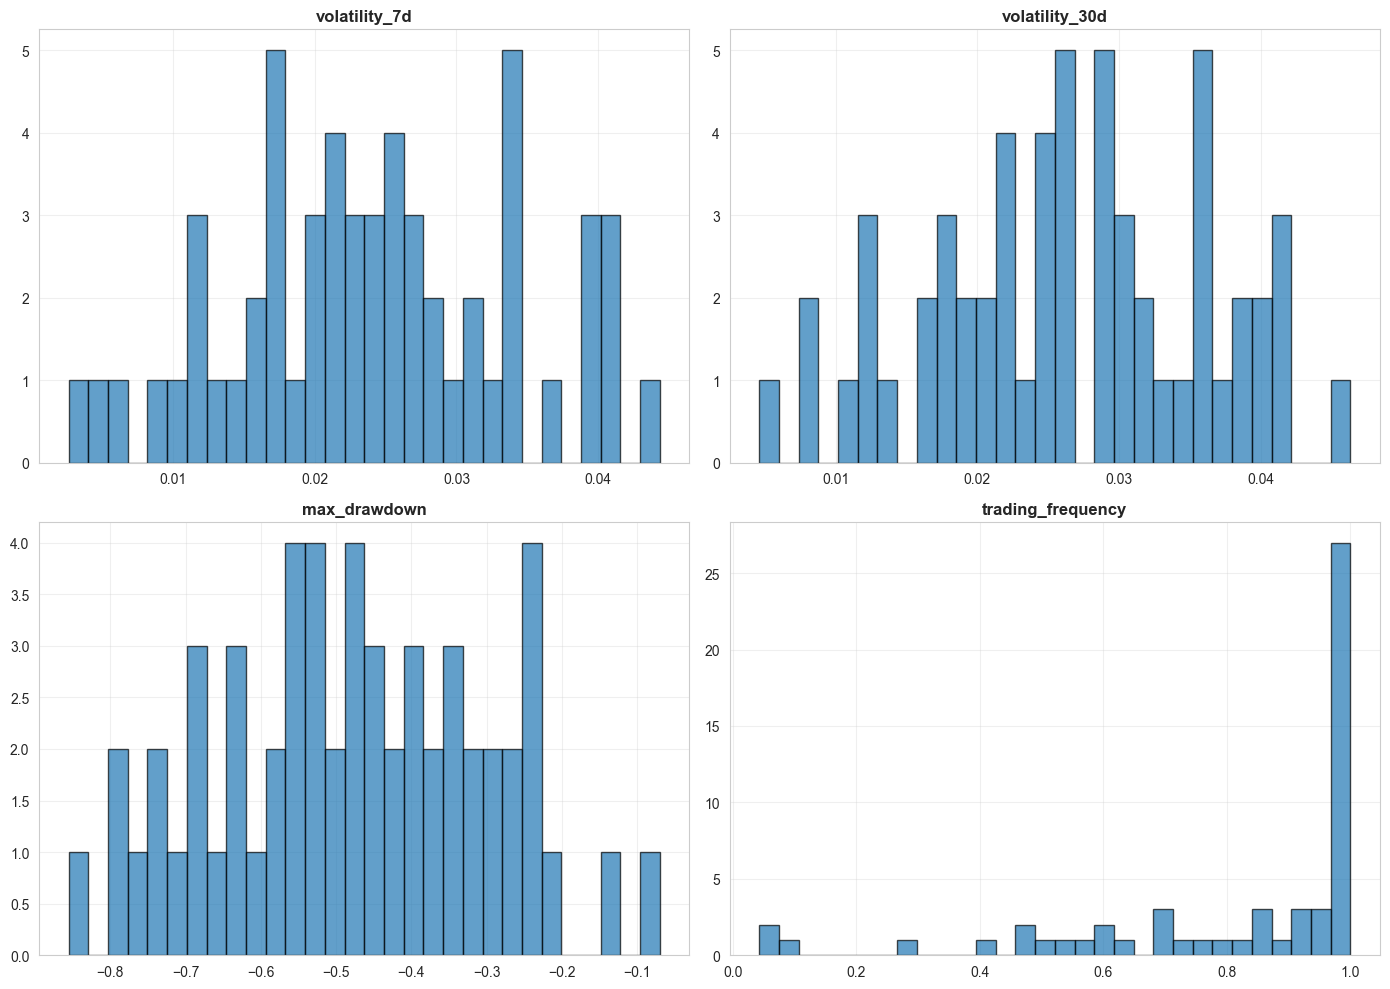

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

features = ['volatility_7d', 'volatility_30d', 'max_drawdown', 'trading_frequency']

for i, feature in enumerate(features):
    axes[i].hist(df_features[feature].dropna(), bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{feature}', fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Sector Analysis

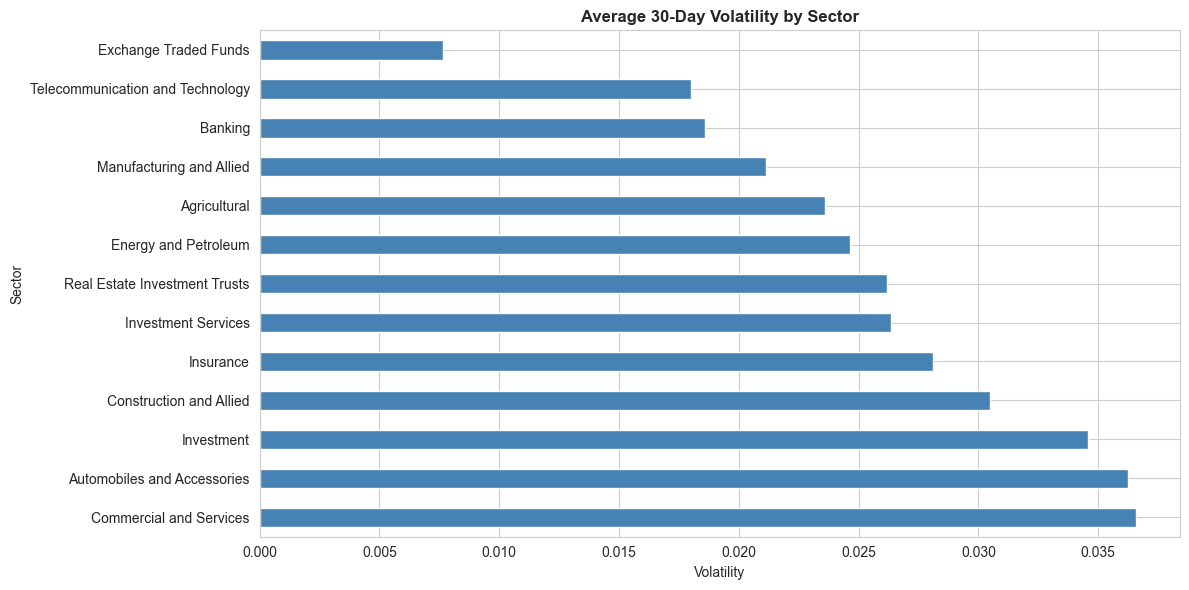

In [93]:
sector_vol = df_features.groupby('Sector')['volatility_30d'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sector_vol.plot(kind='barh', color='steelblue')
plt.title('Average 30-Day Volatility by Sector', fontweight='bold')
plt.xlabel('Volatility')
plt.tight_layout()
plt.show()

# K-Means Clustering

## 1. Clustering Functions